In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'TSLA', 'NVDA', 'SPY']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'TSLA', 'NVDA', 'SPY']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, TSLA, NVDA, SPY]
company_name = ["APPLE", "TESLA", "NVIDIA", "SPY"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-09-07,443.109985,445.549988,442.750000,444.850006,443.286377,70355400,SPY
2023-09-08,444.899994,447.109985,444.529999,445.519989,443.954010,61659700,SPY
2023-09-11,448.239990,448.769989,446.470001,448.450012,446.873749,60180100,SPY
2023-09-12,446.950012,448.529999,445.390015,445.989990,444.422363,67565400,SPY
2023-09-13,446.220001,447.709991,445.079987,446.510010,444.940552,60199300,SPY
2023-09-14,449.070007,451.079987,447.720001,450.359985,448.777008,83430800,SPY
2023-09-15,447.140015,447.480011,442.920013,443.369995,443.369995,111761400,SPY
2023-09-18,443.049988,444.970001,442.559998,443.630005,443.630005,55752200,SPY
2023-09-19,442.679993,443.290009,439.940002,442.709991,442.709991,66478700,SPY


In [2]:
# Summary Stats
SPY.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,409.802936,412.441866,407.216349,409.987996,406.346766,8.357909e+07
std,26.077387,25.380085,26.818216,26.140237,27.573133,2.329239e+07
min,349.209991,359.820007,348.109985,356.559998,351.033936,8.793406e+06
25%,391.627495,395.512505,389.187492,392.897499,387.387779,6.816678e+07
50%,406.964996,409.850006,405.345001,407.849991,403.679459,8.005950e+07
75%,435.117493,437.357491,433.782501,436.417511,434.666794,9.386328e+07
max,459.019989,459.440002,456.049988,457.790009,456.180908,1.892530e+08


In [5]:
# General info
SPY.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-09-20 to 2023-09-20
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


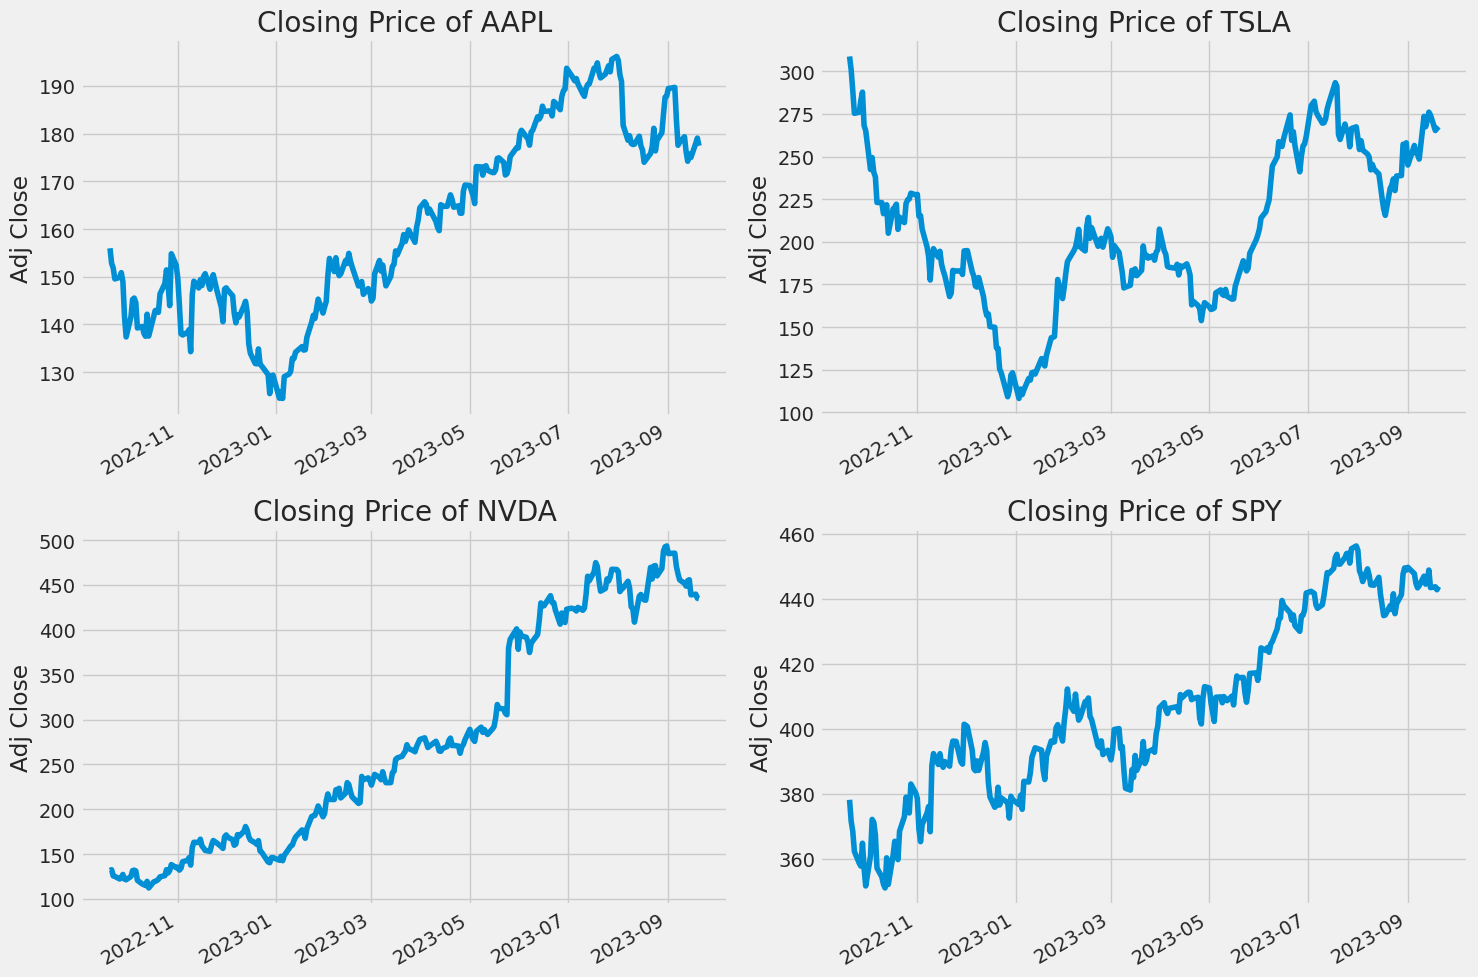

In [6]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

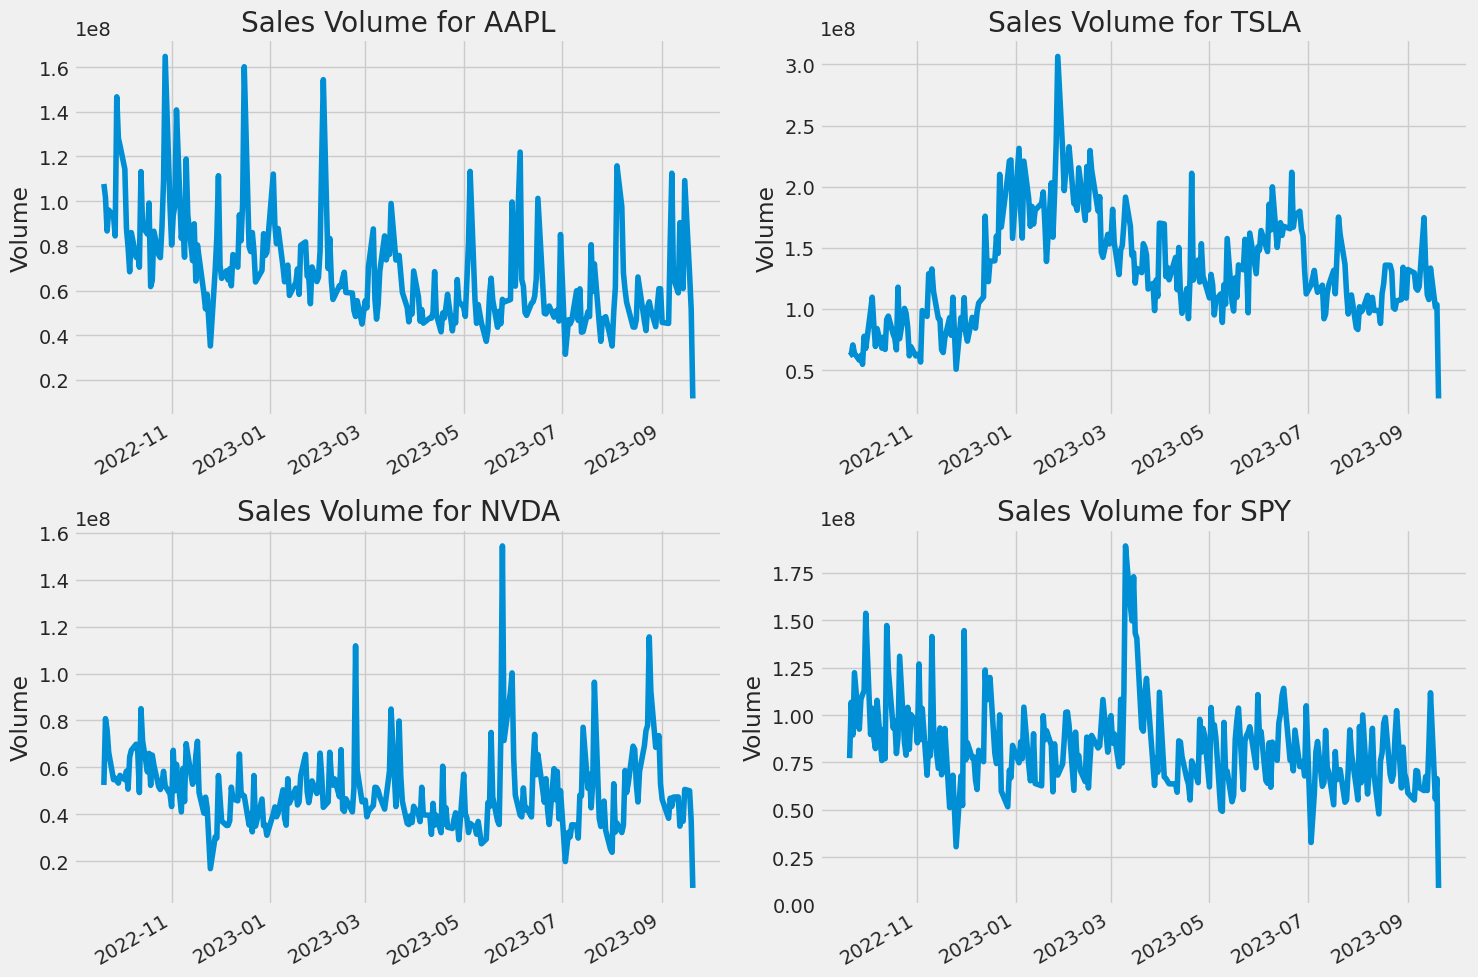

In [7]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

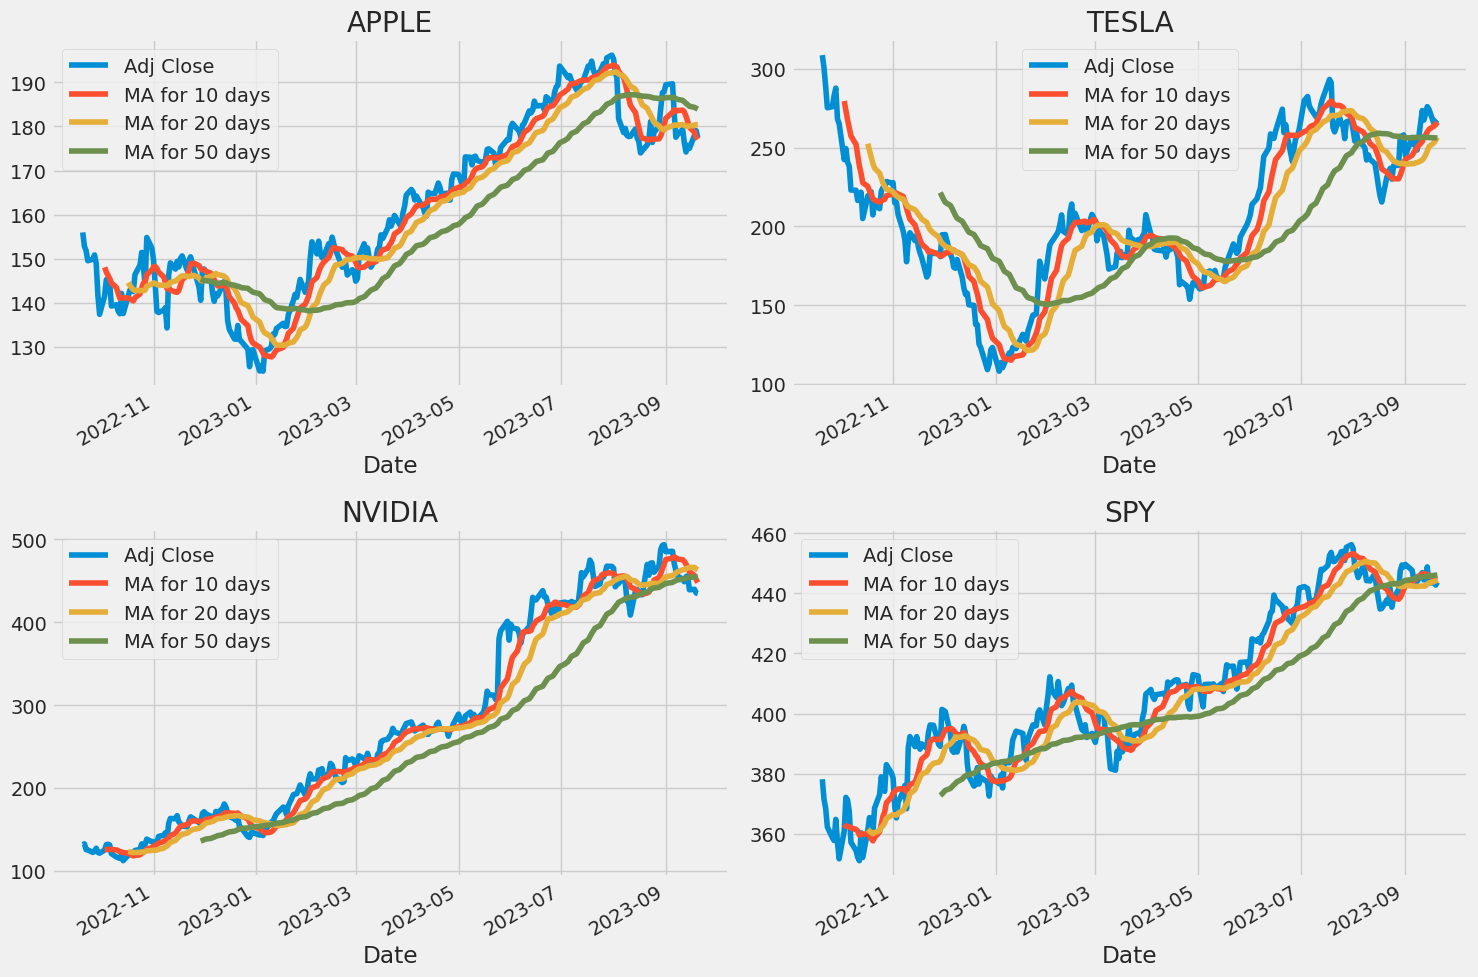

In [8]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('TESLA')

NVDA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('NVIDIA')

SPY[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('SPY')

fig.tight_layout()

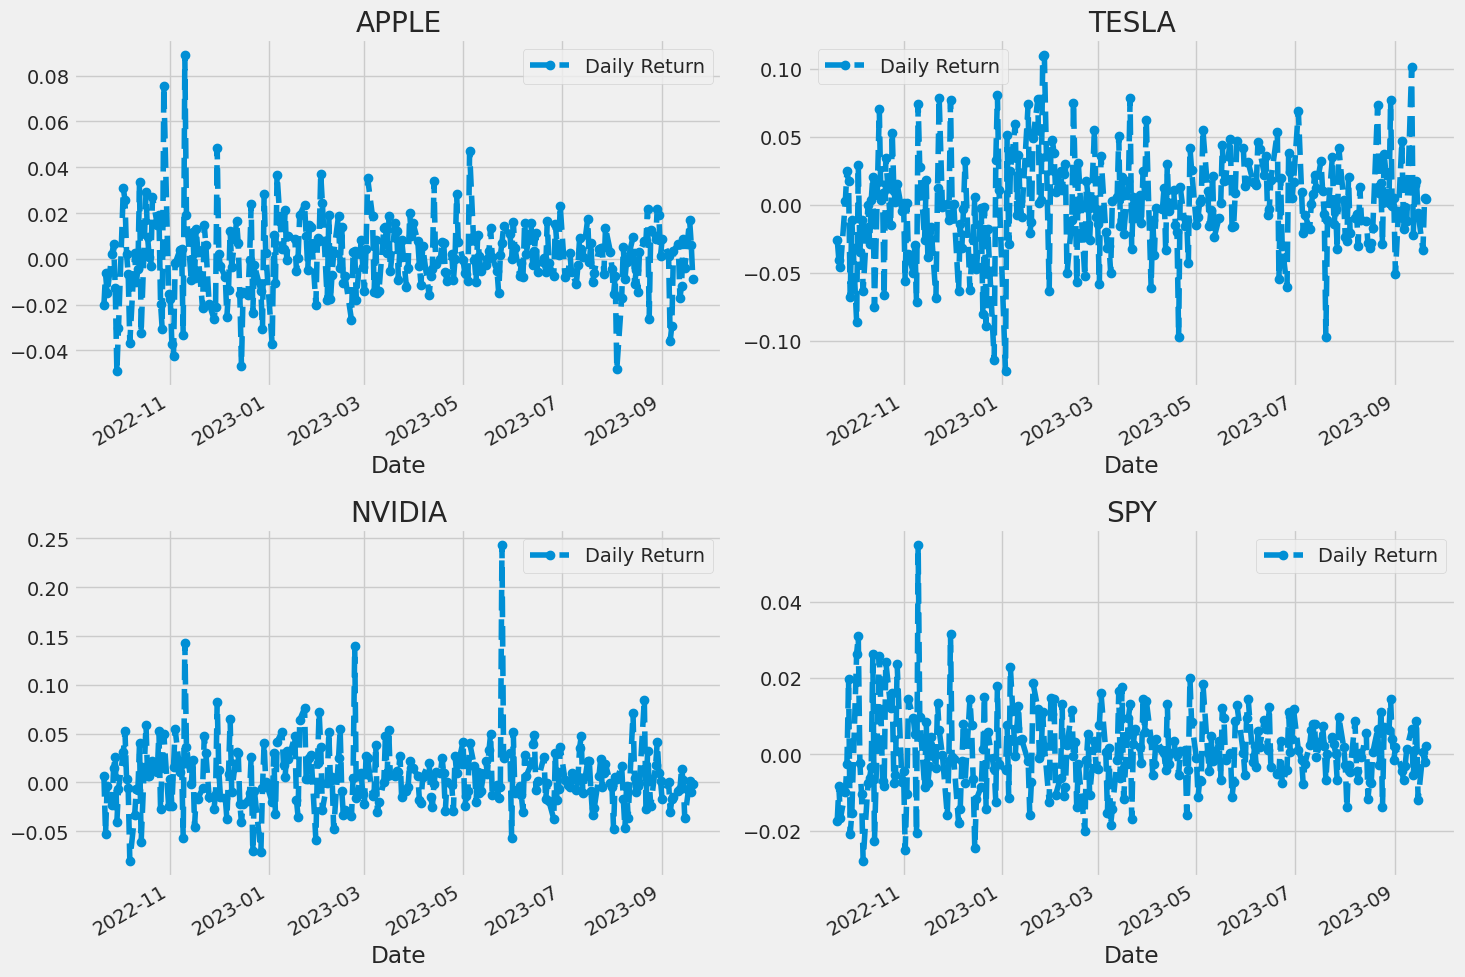

In [9]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

TSLA['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('TESLA')

NVDA['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('NVIDIA')

SPY['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('SPY')

fig.tight_layout()

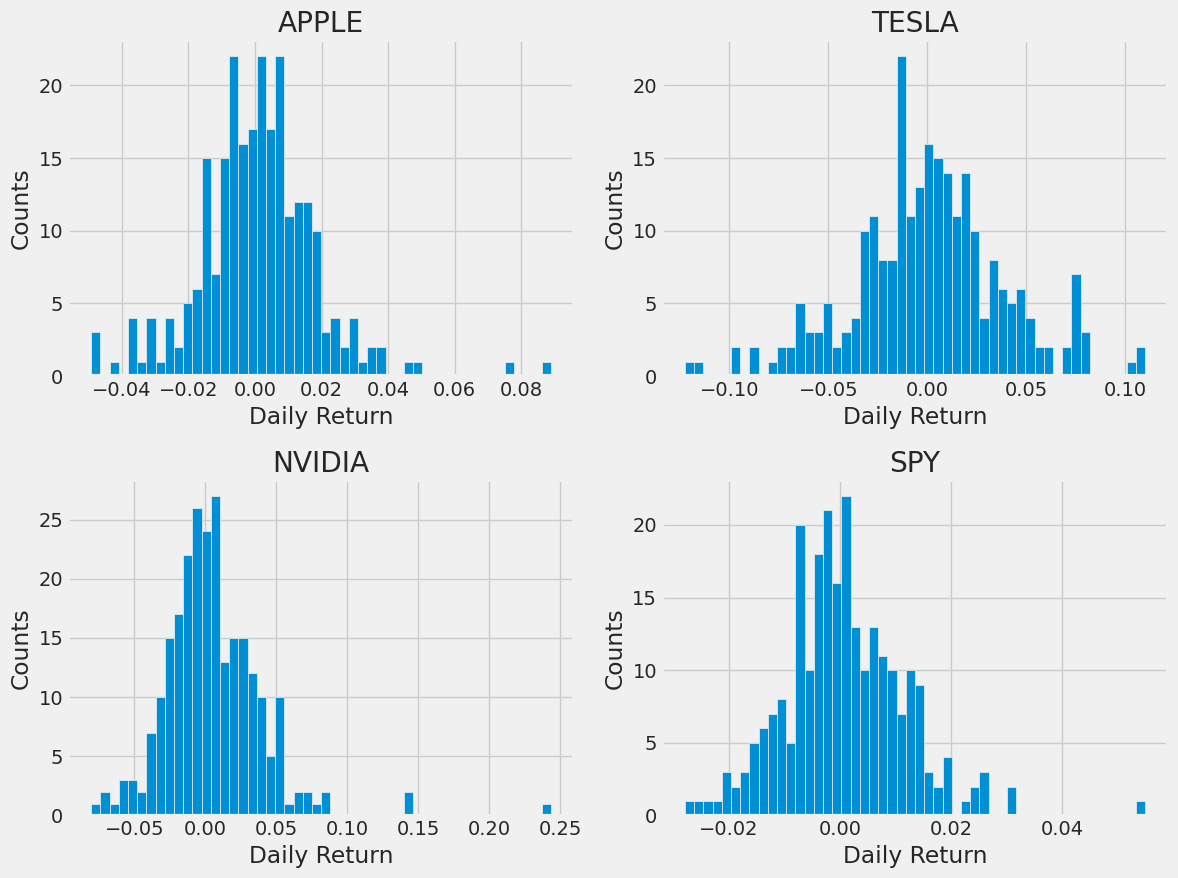

In [10]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [11]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


,AAPL,NVDA,SPY,TSLA
Date,,,,
2022-09-20,NaN,NaN,NaN,NaN
2022-09-21,-0.020268,0.006451,-0.017444,-0.025686
2022-09-22,-0.006375,-0.052786,-0.008400,-0.040592
2022-09-23,-0.015124,-0.003582,-0.016755,-0.045948
2022-09-26,0.002260,-0.023011,-0.009893,0.002470


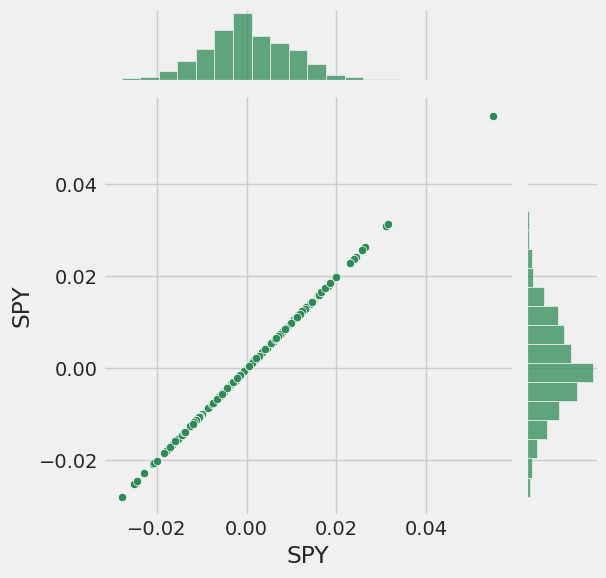

In [12]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='SPY', y='SPY', data=tech_rets, kind='scatter', color='seagreen')

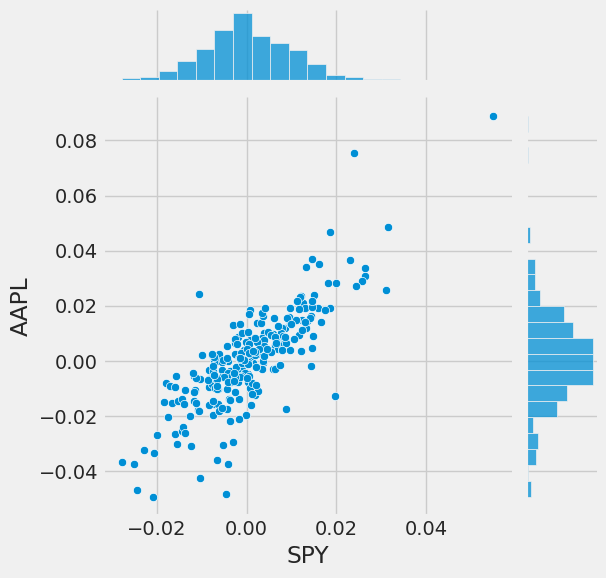

In [13]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='SPY', y='AAPL', data=tech_rets, kind='scatter')

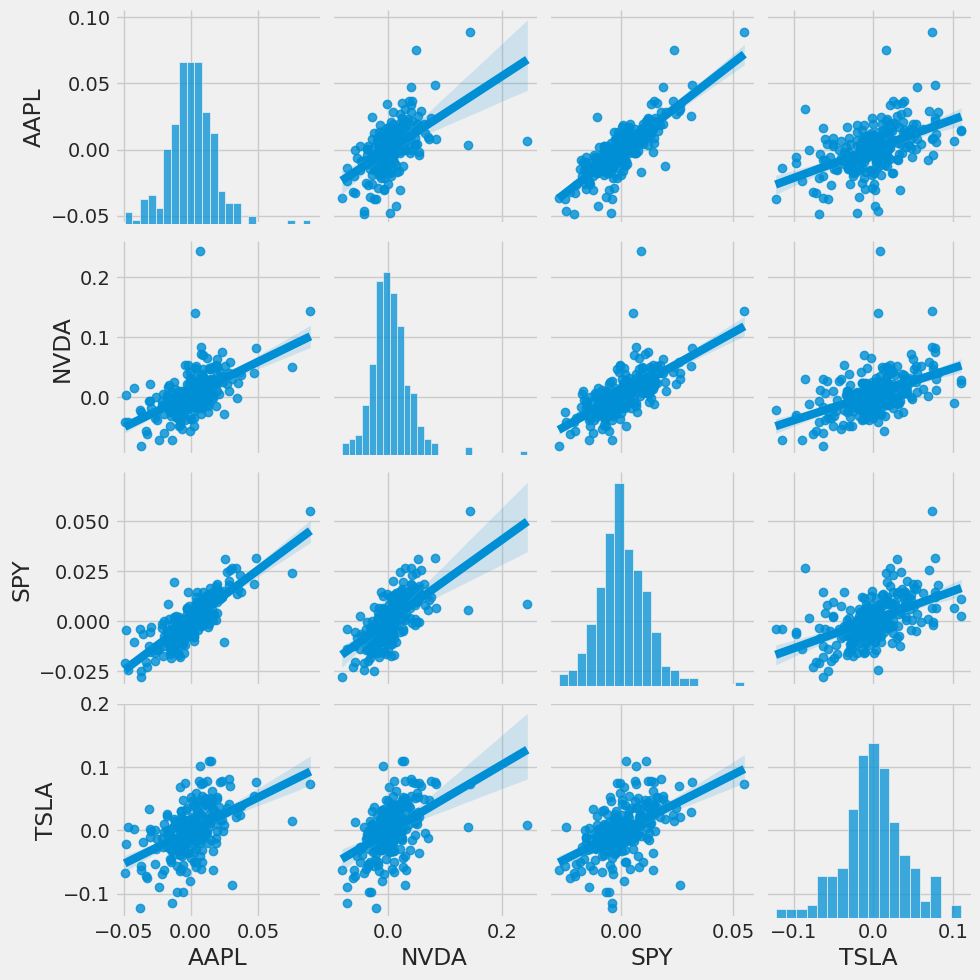

In [14]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

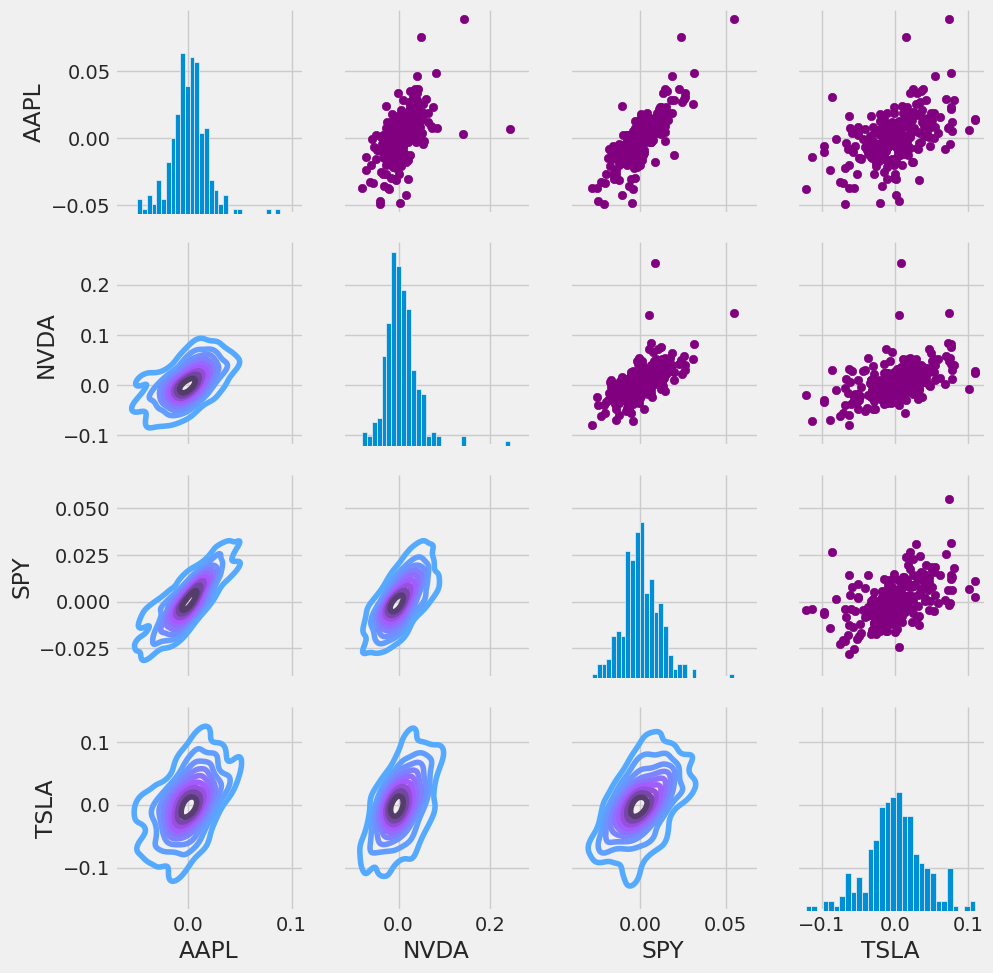

In [15]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

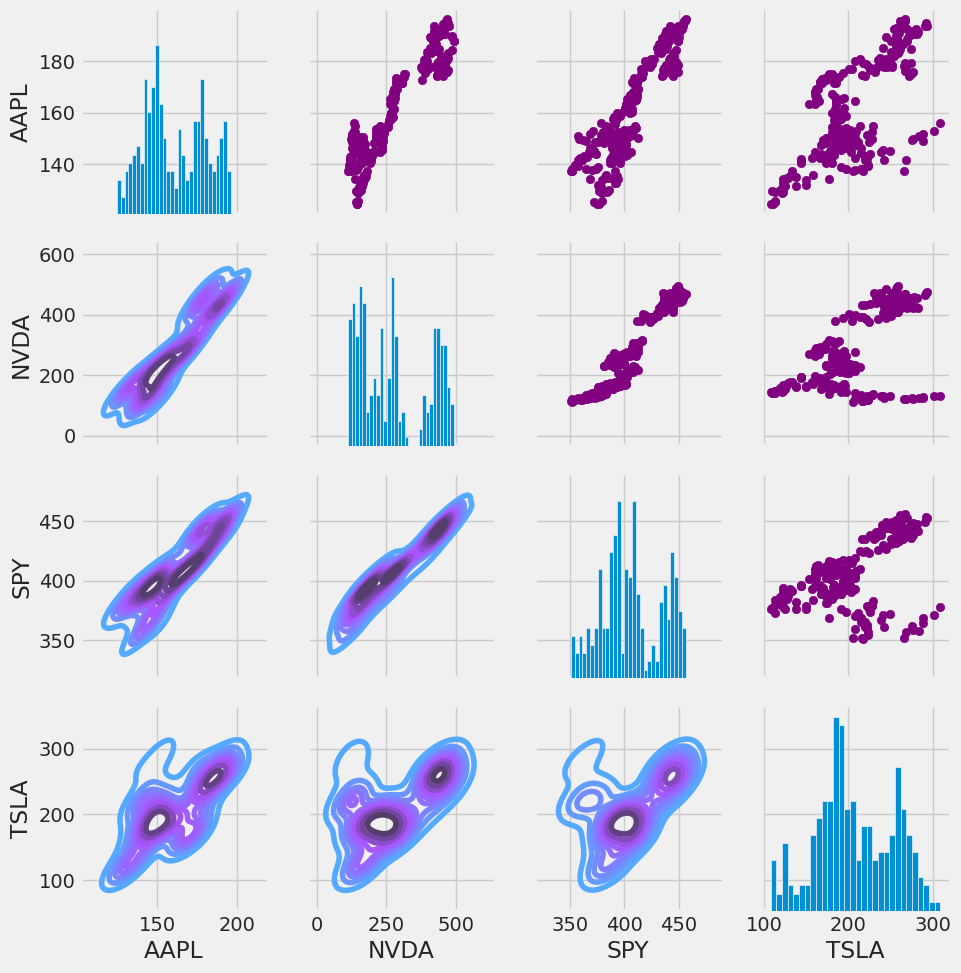

In [16]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

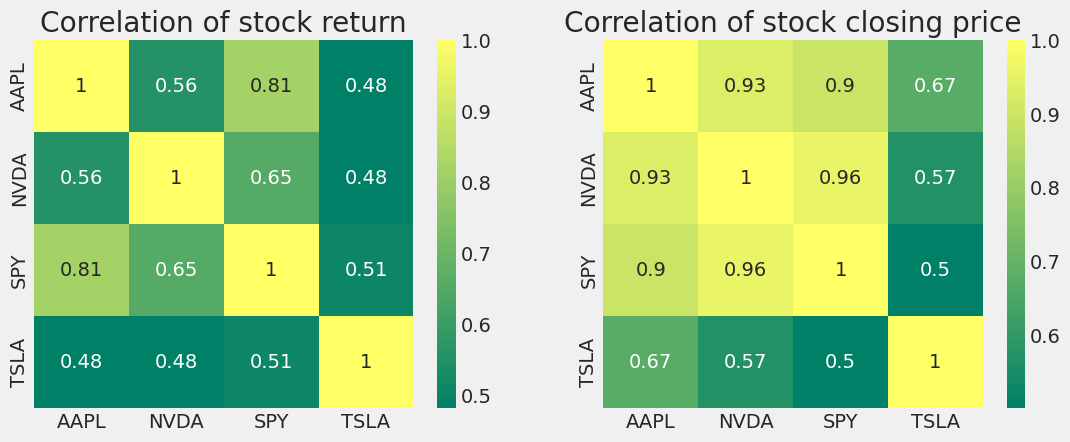

In [17]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

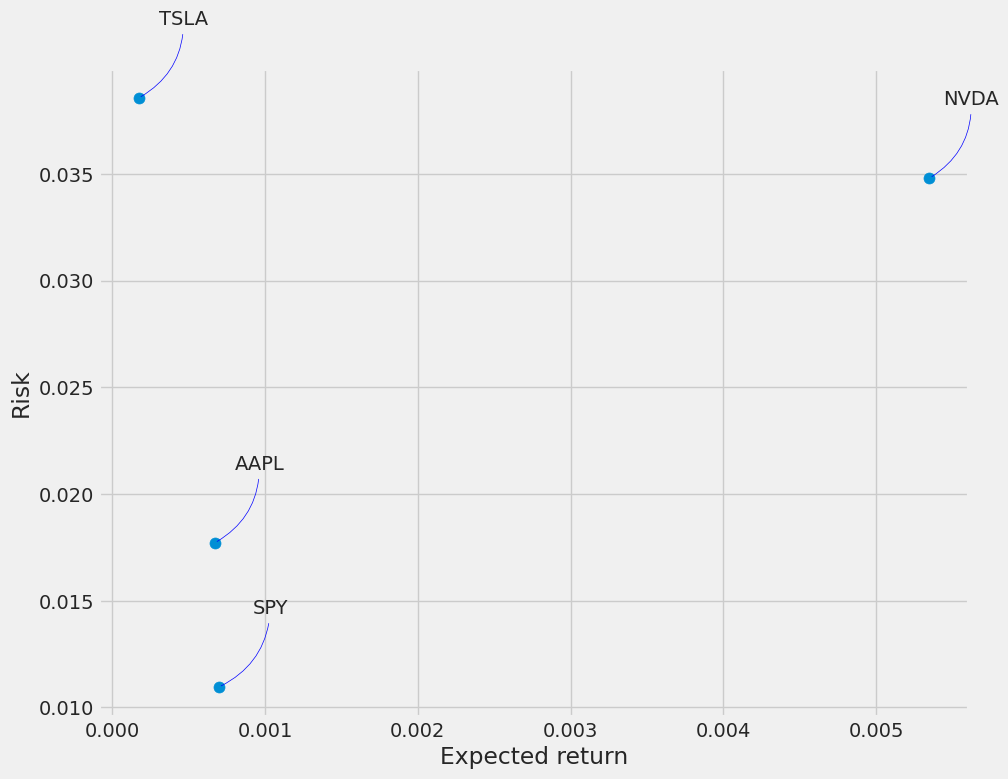

In [18]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [28]:
# Get the stock quote
df = pdr.get_data_yahoo('SPY', start='2001-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02,132.000000,132.156250,127.562500,128.812500,84.365395,8737500
2001-01-03,128.312500,136.000000,127.656250,135.000000,88.417885,19431600
2001-01-04,134.937500,135.468750,133.000000,133.546875,87.466156,9219000
2001-01-05,133.468750,133.625000,129.187500,129.187500,84.610992,12911400
2001-01-08,129.875000,130.187500,127.687500,130.187500,85.265938,6625300
...,...,...,...,...,...,...
2023-09-14,449.070007,451.079987,447.720001,450.359985,448.777008,83430800
2023-09-15,447.140015,447.480011,442.920013,443.369995,443.369995,111761400
2023-09-18,443.049988,444.970001,442.559998,443.630005,443.630005,55752200


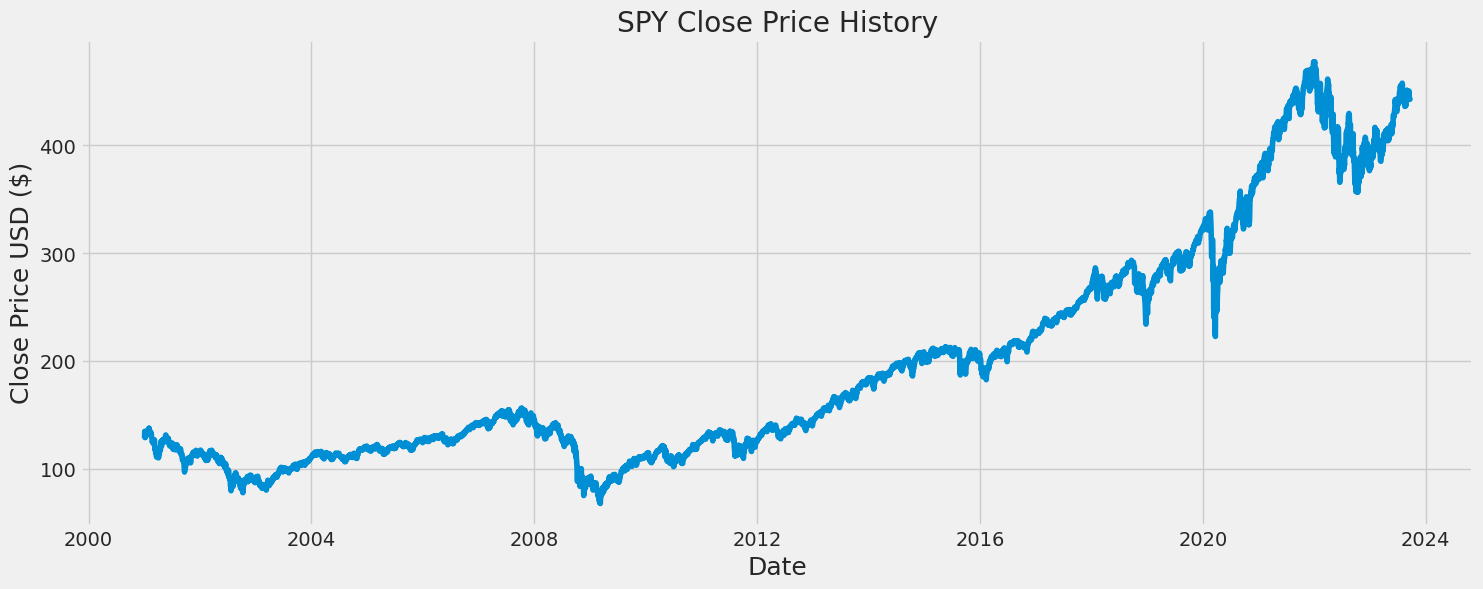

In [29]:
plt.figure(figsize=(16,6))
plt.title('SPY Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [30]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

5430

In [31]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.14819946],
       [0.16330567],
       [0.159758  ],
       ...,
       [0.91679691],
       [0.91455078],
       [0.91684571]])

In [32]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.14819946, 0.16330567, 0.159758  , 0.14911499, 0.1515564 ,
       0.15071716, 0.15628662, 0.1565918 , 0.15598145, 0.15804138,
       0.15952912, 0.16277161, 0.16090241, 0.16307678, 0.16567078,
       0.1666626 , 0.16582337, 0.1654419 , 0.16721193, 0.17014161,
       0.16823732, 0.17045897, 0.16281739, 0.16523436, 0.16425781,
       0.16254884, 0.15871581, 0.15559081, 0.15927736, 0.1566162 ,
       0.15612793, 0.15925292, 0.15207518, 0.14716797, 0.14040528,
       0.14086914, 0.13879394, 0.14528809, 0.14240723, 0.13632812,
       0.13791504, 0.13549805, 0.13825683, 0.14152833, 0.1437256 ,
       0.14406739, 0.1348877 , 0.12199708, 0.12673339, 0.12094727,
       0.12102051, 0.11450196, 0.12021484, 0.11252441, 0.10778809,
       0.10500489, 0.11320802, 0.11677247, 0.12255859, 0.1145752 ])]
[0.11564942335298858]

[array([0.14819946, 0.16330567, 0.159758  , 0.14911499, 0.1515564 ,
       0.15071716, 0.15628662, 0.1565918 , 0.15598145, 0.15804138,
       0.15952912, 0.16277161, 0.16

In [33]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

5370/5370 [==============================] - 112s 20ms/step - loss: 6.6410e-04


In [34]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

9/9 [==============================] - 1s 18ms/step


6.040950390515731

<ipython-input-35-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


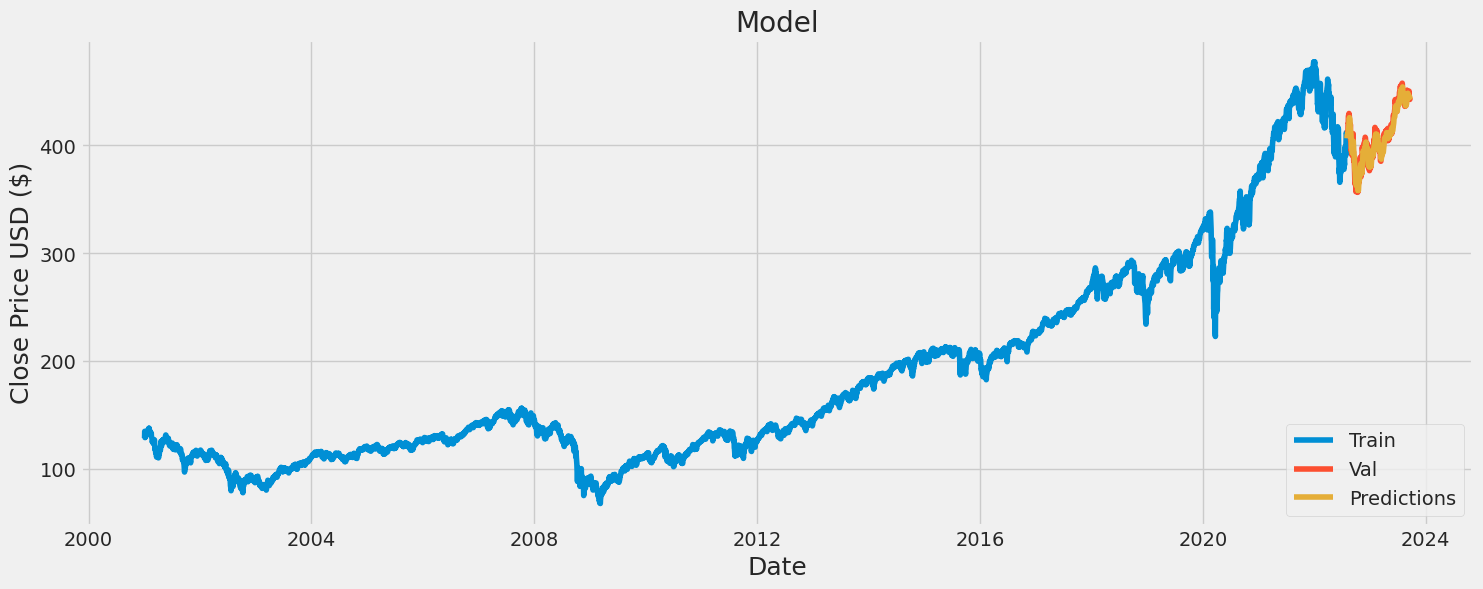

In [35]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [36]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-08-03,414.450012,406.625336
2022-08-04,414.170013,408.685028
2022-08-05,413.470001,410.168304
2022-08-08,412.989990,410.833740
2022-08-09,411.350006,410.898315
...,...,...
2023-09-14,450.359985,444.457123
2023-09-15,443.369995,445.776947
2023-09-18,443.630005,445.013763
